In [1]:
import pandas as pd
import seaborn as sns

# Data loading

In [2]:
df=sns.load_dataset('iris')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# information gathering

In [4]:
# checking dimensions 
df.shape

(150, 5)

In [5]:
df.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [13]:
df.sample(4)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
76,6.8,2.8,4.8,1.4,versicolor
37,4.9,3.6,1.4,0.1,setosa
56,6.3,3.3,4.7,1.6,versicolor


In [14]:
df.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# Data cleaning

In [16]:
# checking duplicates

df.duplicated().sum()

np.int64(1)

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.reset_index(drop=True)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,virginica
145,6.3,2.5,5.0,1.9,virginica
146,6.5,3.0,5.2,2.0,virginica
147,6.2,3.4,5.4,2.3,virginica


In [19]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Visualisation

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:


x=df.iloc[:,:4]
y=df.iloc[:,4]

In [23]:
x,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [149 rows x 4 columns],
 0         setosa
 1         setosa
 2         setosa
 3         setosa
 4         setosa
          ...    
 145    virginica
 146    virginica
 147    virginica
 148    virginica
 149    virginica
 Name: species, Length: 149, dtype: object)

<Axes: >

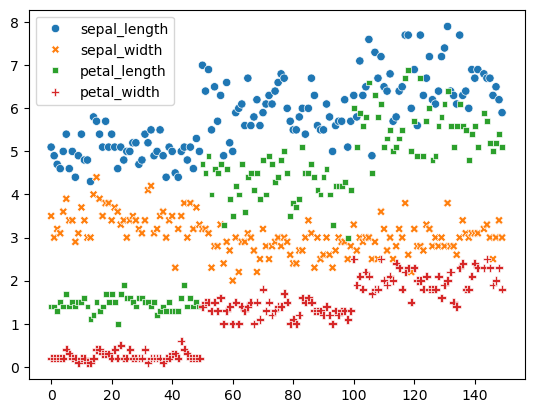

In [24]:
# creating scatter plot

sns.scatterplot(df)

<Axes: >

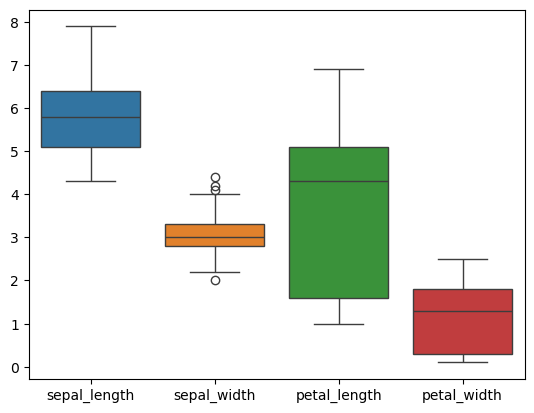

In [25]:
# creating boxplot

sns.boxplot(x)

<Axes: ylabel='sepal_width'>

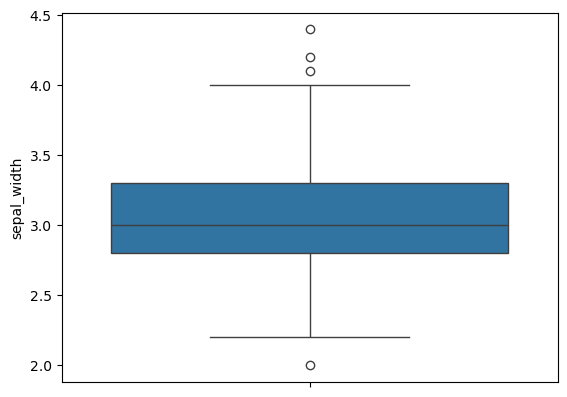

In [32]:
sns.boxplot(x.iloc[:,1])

<Axes: xlabel='sepal_length', ylabel='petal_length'>

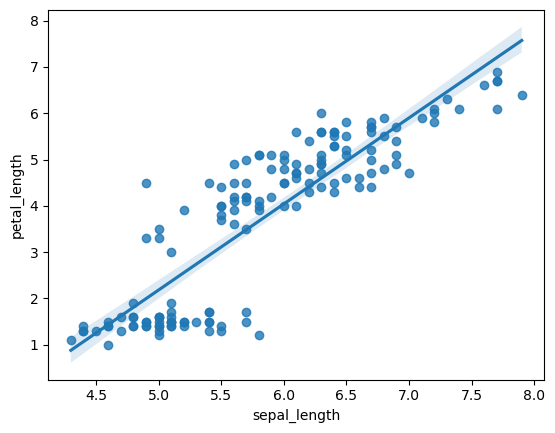

In [34]:
sns.regplot(x='sepal_length',y='petal_length',data=df)

<Axes: >

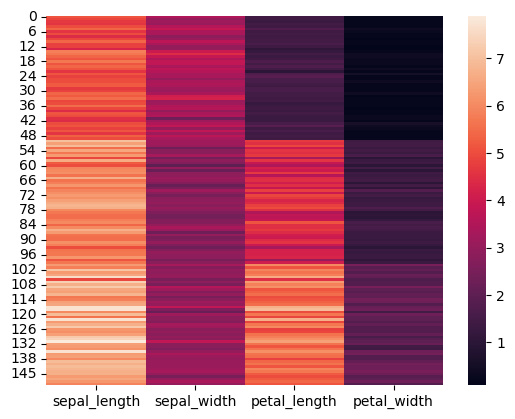

In [37]:
# creating heatmap
sns.heatmap(x)

In [23]:
import numpy as np

# checking for outlier

In [41]:
# function to check for outliers
def handle_outlier(column):
    q1=df[column].quantile(.25)
    q3=df[column].quantile(.75)
    iqr=q3-q1

    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)

    return  df[(df[column]>lower_range) & (df[column]<upper_range)]

In [47]:
df=handle_outlier('sepal_width')

In [48]:
df.count()

sepal_length    145
sepal_width     145
petal_length    145
petal_width     145
species         145
dtype: int64

In [53]:
df.species.unique()

array([0, 1, 2])

In [52]:
# data transformation

df['species']=df['species'].map({'setosa':0,'versicolor':1,'virginica':2})

# Train test split

In [61]:
# spliting data into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=8,test_size=.2)

# making model

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# training model

lr=LogisticRegression()
lr.fit(x_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [65]:

y_pred=lr.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

1.0

In [62]:
# 9085792494774949 - when test size is .2 
# 9086544902864333 - when test size is .3
# 0.8487119973053087 -when test size is .35

In [70]:
lr.predict([[5.1,3.5,1.4,0.2]])

/usr/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [69]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [74]:
results = pd.DataFrame({
    'Model': 'LinearRegression',
    'Actual': y_test.values,
    'Predicted': y_pred 
})

print(results.head(3))

              Model  Actual Predicted
0  LinearRegression  setosa    setosa
1  LinearRegression  setosa    setosa
2  LinearRegression  setosa    setosa
